In [1]:
import pandas as pd
from network import Network, Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
network = Network()
tokenizer = Tokenizer() 

c:\Personal\Tutor\Dian\antitoxic-forum\env\Lib\site-packages\keras\src\layers\core\embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Personal\Tutor\Dian\antitoxic-forum\env\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [8]:
train = pd.read_csv("./data/train-preprocess.csv")

X = train['comment_text']
y = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

In [11]:
X = tokenizer.tokenize(X)

In [12]:
pred = network.predict(X)

4987/4987 ━━━━━━━━━━━━━━━━━━━━ 244s 49ms/step


In [6]:
y_true = y.values
y_pred = pred

In [7]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have your true labels (y_true) and predicted probabilities (y_pred) from your model
# y_true is a 2D binary numpy array, where each row represents the true labels for a sample
# y_pred is a 2D numpy array, where each row represents the predicted probabilities for a sample

# Define the range of threshold values to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize lists to store metrics for each threshold
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Compute metrics for each threshold value
for threshold in thresholds:
    # Binarize the predictions using the threshold
    y_pred_binarized = (y_pred >= threshold).astype(int)

    # Compute the multilabel confusion matrix
    conf_matrix = multilabel_confusion_matrix(y_true, y_pred_binarized)

    # Compute precision, recall, F1-score, and accuracy (micro-averaged)
    precision = precision_score(y_true, y_pred_binarized, average='micro')
    recall = recall_score(y_true, y_pred_binarized, average='micro')
    f1 = f1_score(y_true, y_pred_binarized, average='micro')
    accuracy = accuracy_score(y_true, y_pred_binarized)

    # Store the metrics for this threshold
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Find the index of the maximum accuracy score
max_accuracy_idx = np.argmax(accuracies)

# Print the best threshold value and corresponding metrics
print(f"Best threshold: {thresholds[max_accuracy_idx]}")
print(f"Precision: {precisions[max_accuracy_idx]}")
print(f"Recall: {recalls[max_accuracy_idx]}")
print(f"F1-score: {f1_scores[max_accuracy_idx]}")
print(f"Accuracy: {accuracies[max_accuracy_idx]}")

Best threshold: 0.6
Precision: 0.8488286969253295
Recall: 0.6666666666666666
F1-score: 0.746799774575316
Accuracy: 0.9240795864013787


In [15]:
import pandas as pd

data_thresholds = pd.DataFrame({
  "thresholds": thresholds,
  "precisions": precisions,
  "recalls": recalls,
  "f1_scores": f1_scores,
  "accuracies": accuracies,
})

In [16]:
data_thresholds.head(10)

,thresholds,precisions,recalls,f1_scores,accuracies
0,0.1,0.517769,0.929855,0.665159,0.872160
1,0.2,0.616949,0.885295,0.727155,0.900235
2,0.3,0.694728,0.831537,0.757001,0.914304
3,0.4,0.748332,0.789852,0.768531,0.921416
4,0.5,0.798314,0.735087,0.765397,0.923986
5,0.6,0.848829,0.666667,0.746800,0.924080
6,0.7,0.889677,0.594653,0.712846,0.921291
7,0.8,0.930855,0.514733,0.662903,0.916716
8,0.9,0.967339,0.378899,0.544516,0.907034


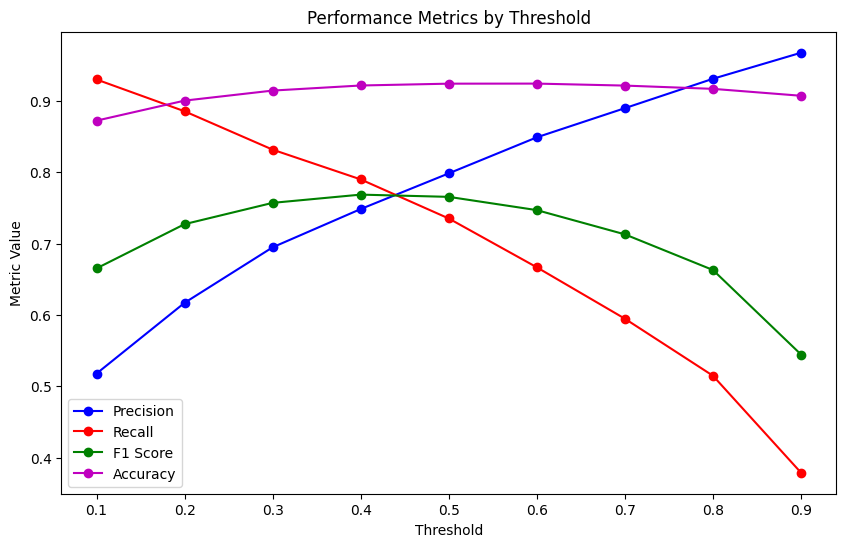

In [17]:
from matplotlib import pyplot as plt

thresholds = data_thresholds["thresholds"]
precisions = data_thresholds["precisions"]
recalls = data_thresholds["recalls"]
f1_scores = data_thresholds["f1_scores"]
accuracies = data_thresholds["accuracies"]

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions, label="Precision", color='b', linestyle='-', marker='o')
plt.plot(thresholds, recalls, label="Recall", color='r', linestyle='-', marker='o')
plt.plot(thresholds, f1_scores, label="F1 Score", color='g', linestyle='-', marker='o')
plt.plot(thresholds, accuracies, label="Accuracy", color='m', linestyle='-', marker='o')

plt.title("Performance Metrics by Threshold")
plt.xlabel("Threshold")
plt.ylabel("Metric Value")

plt.legend()

plt.show()